In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
Data=pd.read_csv('Fake_Reg.csv')

In [4]:
Data

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


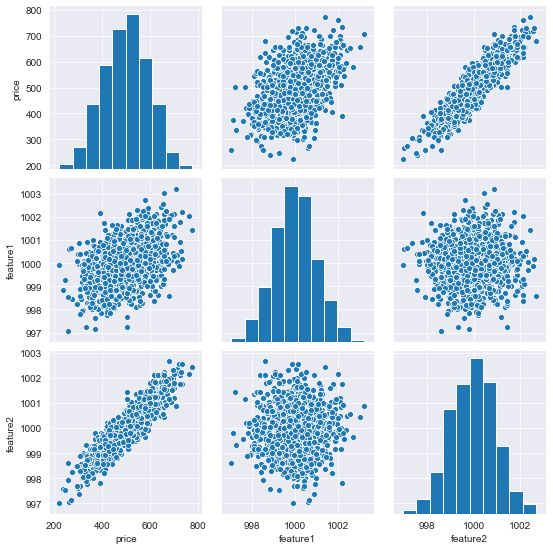

In [5]:
sns.pairplot(Data)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=Data[['feature1','feature2']].values
y=Data['price'].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.shape

(800, 2)

In [10]:
y_train.shape

(800,)

In [11]:
#Normalization:In this approach we scale down the values of features between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [13]:
Scaler=MinMaxScaler()

In [63]:
Scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
x_train

array([[0.6096    , 0.67841447],
       [0.52888958, 0.20003528],
       [0.66124446, 0.48545932],
       ...,
       [0.55540613, 0.78470227],
       [0.29338885, 0.38107935],
       [0.56890903, 0.41595995]])

In [65]:
x_train=Scaler.transform(x_train)
x_test=Scaler.transform(x_test)

In [66]:
x_train

array([[0.6096    , 0.67841447],
       [0.52888958, 0.20003528],
       [0.66124446, 0.48545932],
       ...,
       [0.55540613, 0.78470227],
       [0.29338885, 0.38107935],
       [0.56890903, 0.41595995]])

In [16]:
import tensorflow as tf

In [17]:
# Sequence of Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [18]:
# Adding in Layers one by one:
Model=Sequential()

Model.add(Dense(2))
Model.add(Dense(2))
Model.add(Dense(2))

In [19]:
# As a List of Layers:
Model=Sequential([Dense(units=2),
                  Dense(units=2),
                  Dense(units=2)
                 ])

In [20]:
Model=Sequential()

Model.add(Dense(4,activation='relu'))
Model.add(Dense(4,activation='relu'))
Model.add(Dense(4,activation='relu'))
# Output Node for Prediction:
Model.add(Dense(1))

Model.compile(optimizer='rmsprop',loss='mse')

In [21]:
# For a MultiClass Classification Problem:
Model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a Binary Classification Problem:
Model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a Mean Squared Error Regression Problem:
Model.compile(optimizer='rmsprop',
              loss='mse')

In [22]:
# Using 'Validation_Data' or 'Validation_Split' with the fit methods of Keras Models,Evaluation will be run at the end of every Epoch
# Epoch:When the Entire Dataset is passed Forward or Backward through the Neural Network
Model.fit(x_train,y_train,epochs=250)

Train on 800 samples
Epoch 1/250
800/800 [==============================] - 2s 2ms/sample - loss: 255696.0069
Epoch 2/250
800/800 [==============================] - 0s 99us/sample - loss: 255505.8587
Epoch 3/250
800/800 [==============================] - 0s 106us/sample - loss: 255305.5975
Epoch 4/250
800/800 [==============================] - 0s 100us/sample - loss: 255074.1169
Epoch 5/250
800/800 [==============================] - 0s 90us/sample - loss: 254808.1212
Epoch 6/250
800/800 [==============================] - 0s 85us/sample - loss: 254509.5062
Epoch 7/250
800/800 [==============================] - 0s 95us/sample - loss: 254176.9506
Epoch 8/250
800/800 [==============================] - 0s 91us/sample - loss: 253808.0294
Epoch 9/250
800/800 [==============================] - 0s 99us/sample - loss: 253401.0194
Epoch 10/250
800/800 [==============================] - 0s 91us/sample - loss: 252954.7387
Epoch 11/250
800/800 [==============================] - 0s 111us/sample - los

800/800 [==============================] - 0s 86us/sample - loss: 2088.3407
Epoch 92/250
800/800 [==============================] - 0s 82us/sample - loss: 2057.0103
Epoch 93/250
800/800 [==============================] - 0s 91us/sample - loss: 2021.7165
Epoch 94/250
800/800 [==============================] - 0s 125us/sample - loss: 1996.7978
Epoch 95/250
800/800 [==============================] - 0s 186us/sample - loss: 1963.3661
Epoch 96/250
800/800 [==============================] - 0s 136us/sample - loss: 1930.4309
Epoch 97/250
800/800 [==============================] - 0s 86us/sample - loss: 1897.8189
Epoch 98/250
800/800 [==============================] - 0s 103us/sample - loss: 1867.1500
Epoch 99/250
800/800 [==============================] - 0s 138us/sample - loss: 1832.5735
Epoch 100/250
800/800 [==============================] - 0s 131us/sample - loss: 1804.0457
Epoch 101/250
800/800 [==============================] - 0s 146us/sample - loss: 1773.8830
Epoch 102/250
800/800 [==

800/800 [==============================] - 0s 85us/sample - loss: 57.8097
Epoch 183/250
800/800 [==============================] - 0s 88us/sample - loss: 53.3370
Epoch 184/250
800/800 [==============================] - 0s 93us/sample - loss: 49.6956
Epoch 185/250
800/800 [==============================] - 0s 79us/sample - loss: 46.1909
Epoch 186/250
800/800 [==============================] - 0s 85us/sample - loss: 43.2293
Epoch 187/250
800/800 [==============================] - 0s 89us/sample - loss: 40.3421
Epoch 188/250
800/800 [==============================] - 0s 101us/sample - loss: 37.7429
Epoch 189/250
800/800 [==============================] - 0s 117us/sample - loss: 35.2759
Epoch 190/250
800/800 [==============================] - 0s 100us/sample - loss: 33.9792
Epoch 191/250
800/800 [==============================] - 0s 90us/sample - loss: 32.5390
Epoch 192/250
800/800 [==============================] - 0s 81us/sample - loss: 30.9737
Epoch 193/250
800/800 [====================

In [23]:
Model.history.history

{'loss': [255696.006875,
  255505.85875,
  255305.5975,
  255074.116875,
  254808.12125,
  254509.50625,
  254176.950625,
  253808.029375,
  253401.019375,
  252954.73875,
  252470.22,
  251941.98,
  251372.48125,
  250747.3925,
  250075.806875,
  249348.3725,
  248562.42625,
  247711.9425,
  246801.183125,
  245807.724375,
  244733.7775,
  243573.483125,
  242325.011875,
  240980.28375,
  239542.64375,
  237996.6775,
  236360.3275,
  234599.845,
  232733.271875,
  230752.985,
  228652.939375,
  226410.44625,
  224060.829375,
  221584.16875,
  218964.65125,
  216199.596875,
  213316.9,
  210278.894375,
  207109.890625,
  203783.604375,
  200301.783125,
  196686.8375,
  192914.078125,
  188976.90625,
  184917.73375,
  180703.779375,
  176322.73125,
  171810.619375,
  167140.091875,
  162322.1325,
  157361.159375,
  152262.90625,
  147079.9278125,
  141751.761875,
  136283.3496875,
  130721.2853125,
  125049.1703125,
  119290.2453125,
  113455.0475,
  107577.96125,
  101625.6721875,
  95

In [24]:
Loss=Model.history.history['loss']

Text(0.5, 1.0, 'Training Loss Per Epoch')

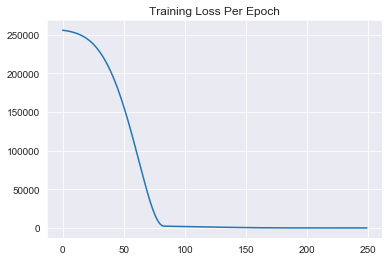

In [25]:
sns.lineplot(x=range(len(Loss)),y=Loss)
plt.title('Training Loss Per Epoch')

In [26]:
Model.metrics_names

['loss']

In [27]:
Training_Score=Model.evaluate(x_train,y_train,verbose=0)
Test_Score=Model.evaluate(x_test,y_test,verbose=0)

In [28]:
Training_Score

23.96429557800293

In [29]:
Test_Score

25.762080841064453

In [30]:
y_pred=Model.predict(x_test)

In [31]:
y_pred

array([[405.04898],
       [623.24054],
       [591.92804],
       [571.74255],
       [366.0068 ],
       [578.8356 ],
       [514.4138 ],
       [459.00153],
       [548.77454],
       [447.44684],
       [611.49927],
       [549.04254],
       [418.82675],
       [408.53952],
       [651.3308 ],
       [437.15692],
       [508.49802],
       [659.2988 ],
       [662.13513],
       [565.40515],
       [333.81107],
       [444.55923],
       [382.14816],
       [378.53836],
       [566.2849 ],
       [610.0982 ],
       [532.05994],
       [427.6494 ],
       [654.9125 ],
       [413.98718],
       [442.53177],
       [484.86752],
       [438.1934 ],
       [681.3619 ],
       [424.7597 ],
       [417.28195],
       [502.0664 ],
       [550.22736],
       [509.1728 ],
       [394.75897],
       [618.3773 ],
       [416.49557],
       [604.2253 ],
       [445.9772 ],
       [501.71576],
       [581.8411 ],
       [668.9951 ],
       [490.2875 ],
       [318.5337 ],
       [485.12933],


In [32]:
len(y_pred)

200

In [33]:
y_test

array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
       371.22410361, 584.38110772, 514.40564086, 464.11587006,
       551.65009963, 451.8041724 , 613.95995262, 547.73198239,
       428.31614877, 413.84178036, 654.83912076, 429.21452014,
       512.04904895, 657.71868008, 674.31102047, 565.19184559,
       338.0902386 , 450.9760715 , 375.13754715, 379.10982057,
       562.05793604, 593.6677957 , 531.27754687, 423.65453319,
       656.65474461, 412.90687671, 439.49653517, 488.78691774,
       448.51914416, 685.21654079, 424.81078609, 418.45717839,
       507.44318662, 550.14246248, 503.21614081, 397.88209319,
       621.11885596, 411.57560703, 609.3840753 , 449.02606966,
       503.51419982, 578.32901814, 664.50877632, 498.6284209 ,
       316.9505926 , 478.35823792, 514.89474416, 374.19760282,
       531.66193891, 405.40016562, 637.30962074, 482.55641188,
       624.99250404, 624.24709206, 455.13953399, 484.46159148,
       492.93591939, 477.73749721, 689.1734889 , 397.62

In [34]:
Y_Pred=pd.Series(y_pred.reshape(200,))

In [35]:
Y_Pred

0      405.048981
1      623.240540
2      591.928040
3      571.742554
4      366.006805
          ...    
195    644.998413
196    527.614563
197    336.996918
198    492.406891
199    410.146118
Length: 200, dtype: float32

In [36]:
Data1=pd.DataFrame(y_test,columns=['Y_Test'])

In [37]:
Data1

,Y_Test
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
195,645.708440
196,522.358884
197,338.133842
198,497.464727


In [38]:
Data2=pd.concat([Data1,Y_Pred],axis=1)

In [39]:
Data2

,Y_Test,0
0,402.296319,405.048981
1,624.156198,623.240540
2,582.455066,591.928040
3,578.588606,571.742554
4,371.224104,366.006805
...,...,...
195,645.708440,644.998413
196,522.358884,527.614563
197,338.133842,336.996918
198,497.464727,492.406891


In [40]:
Data2.columns=['Y_Test','Y_Pred']

In [41]:
Data2

,Y_Test,Y_Pred
0,402.296319,405.048981
1,624.156198,623.240540
2,582.455066,591.928040
3,578.588606,571.742554
4,371.224104,366.006805
...,...,...
195,645.708440,644.998413
196,522.358884,527.614563
197,338.133842,336.996918
198,497.464727,492.406891


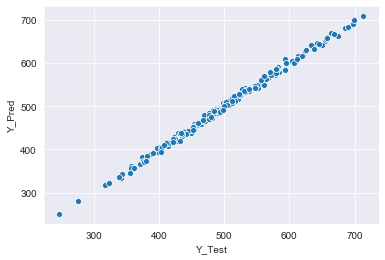

In [42]:
sns.scatterplot(x='Y_Test',y='Y_Pred',data=Data2)

In [43]:
Data2['Error']=Data2['Y_Test']-Data2['Y_Pred']

In [44]:
Data2

,Y_Test,Y_Pred,Error
0,402.296319,405.048981,-2.752662
1,624.156198,623.240540,0.915659
2,582.455066,591.928040,-9.472973
3,578.588606,571.742554,6.846053
4,371.224104,366.006805,5.217298
...,...,...,...
195,645.708440,644.998413,0.710027
196,522.358884,527.614563,-5.255679
197,338.133842,336.996918,1.136924
198,497.464727,492.406891,5.057836


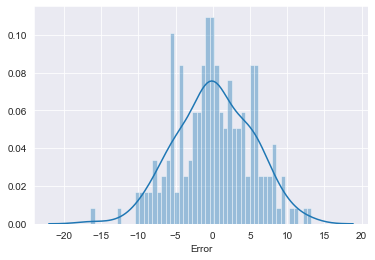

In [45]:
sns.distplot(Data2['Error'],bins=50)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
print(r2_score(y_test,y_pred))

0.9969447538657685


In [48]:
print(r2_score(Data2['Y_Test'],Data2['Y_Pred']))

0.9969447538657685


In [49]:
print(mean_absolute_error(y_test,y_pred))

4.03604155407522


In [50]:
print(mean_squared_error(y_test,y_pred))

25.76208157851197


In [57]:
# Predicting New Data:
Number=[[998,1000]]
Scaler.transform(Number)

array([[0.15312457, 0.52980619]])

In [68]:
Number

array([[-188.49522157, -206.8047671 ]])

In [69]:
Model.predict(Number)

array([[1759.6875]], dtype=float32)

In [77]:
# Saving the Model:
from tensorflow.keras.models import load_model

In [78]:
Model.save('My_Model.h5')

In [80]:
# Load Model
Later_Model=load_model('My_Model.h5')

In [81]:
Later_Model.predict(Number)

array([[1759.6875]], dtype=float32)